# Linear Regression for Time Series Analysis.

# Juan Guzman

Linear regression analysis of Wages by using different methods and inspection of Residuals.

Analysis done in R, however, it is implemented in google colab notebook for convenience.


In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# 1. Installing Necessary Packages for Analysis:

In [ ]:
%%R
install.packages('jtools')
install.packages('lubridate')
install.packages('e1071')
install.packages('ggplot2')

In [ ]:
%%R
# Read the data into your software.
library(lubridate)
library(jtools)
library(ggplot2)
library(e1071)

# 1. Plotting the time series.

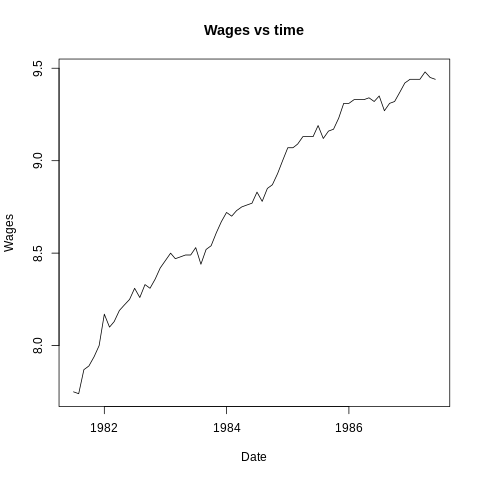

In [ ]:
%%R
wage_data <- read.csv("/content/drive/MyDrive/STAT619 - Time series analysis /ass2_wages.csv", sep = ",")

combined_date <- paste0(wage_data$Year,sep = "-", wage_data$Month)

#Replace original columns with the combined and formatted date
wage_data$date <- combined_date

# Convert combined date to date format (YYYY-MM)
wage_data$date <- ym(combined_date)


summary(wage_data$date)
summary(wage_data$Wages)

# Plotting the data:
plot.default(wage_data$date, wage_data$Wages, type='l', xlab='Date', ylab='Wages', main = "Wages vs time")

There is a wage increase with time. So this means that the series is non-stationary

# 2. Using matrix operations to fit a least square trend model.



Call:
lm(formula = y ~ x1, data = wage_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23825 -0.04963  0.01936  0.05795  0.13050 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.723e+00  8.172e-02   57.79   <2e-16 ***
x1          7.696e-04  1.537e-05   50.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08248 on 70 degrees of freedom
Multiple R-squared:  0.9728,	Adjusted R-squared:  0.9725 
F-statistic:  2508 on 1 and 70 DF,  p-value: < 2.2e-16



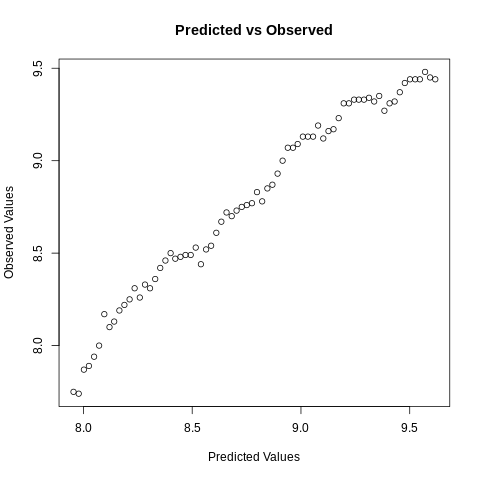

In [ ]:
%%R

# Using the normal equations:
x1 <- as.matrix(wage_data$date)
x0 <- matrix(1, 72)

y <- as.matrix(wage_data$Wages)
x <- cbind(x0,cbind(x1))

# Find x transpose
xt <- t(x)
xtx <- xt %*% x
xty <- xt %*% y
xtxinv <- solve(xtx)
xtxinvxty <- xtxinv %*% xty

# Use lm model to show beta
beta <- lm(y ~ x1,wage_data)
betahat <- fitted(beta)

#Plot yhat vs y using the estimation results

plot.default(predict(beta), y, xlab = "Predicted Values", ylab = "Observed Values", main = "Predicted vs Observed")
summary(beta)

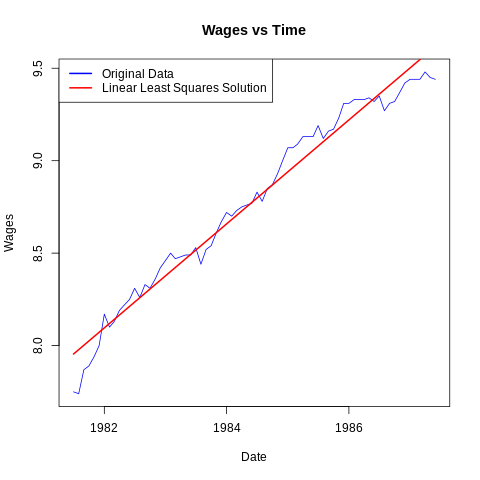

In [ ]:
%%R
# Plotting original data
plot(wage_data$date, wage_data$Wages, type = 'l', xlab = 'Date', ylab = 'Wages', main = 'Wages vs Time', col = 'blue')
lines(wage_data$date, betahat, col = 'red', lwd = 2)
legend("topleft", legend = c("Original Data", "Linear Least Squares Solution"), col = c("blue", "red"), lty = 1, lwd = 2)


# 2.  Fitting a linear time trend model using ordinary least squares.

Plotting the linear trend overlain on the data, and returning the estimated regression equation.


Estimated regression equation for linear trend model: 
 Wages =  4.72  +  8e-04  * Date

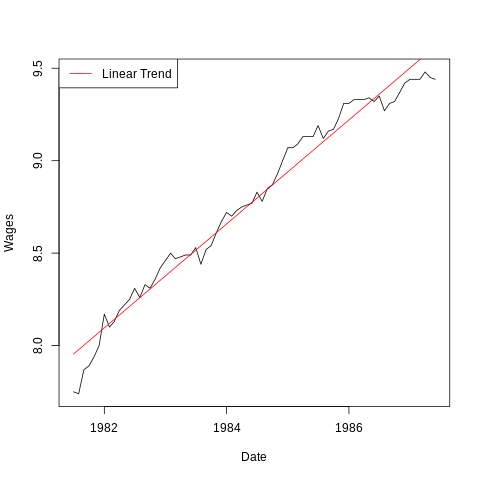

In [ ]:
%%R

linear_model <- lm(Wages ~ date, data = wage_data)
summary(linear_model)

# Plotting the data with linear trend overlain
plot(wage_data$date, wage_data$Wages, type = "l", xlab = "Date", ylab = "Wages")
lines(wage_data$date, predict(linear_model), col = "red")
legend("topleft", legend = "Linear Trend", col = "red", lty = 1)

# Estimated regression equation
cat("Estimated regression equation for linear trend model: \n Wages = ", round(coef(linear_model)[1], 2), " + ", round(coef(linear_model)[2], 4), " * Date")

# Wages =  4.72  +  8e-04  * Date

In [ ]:
# Call:
#  lm(formula = Wages ~ date, data = wage_data)

# Residuals:
#    Min       1Q   Median       3Q      Max
#  -0.23825 -0.04963  0.01936  0.05795  0.13050

# Coefficients:
#   Estimate Std. Error t value Pr(>|t|)
# (Intercept)  4.723e+00  8.172e-02   57.79   <2e-16 ***
#   date       7.696e-04  1.537e-05   50.08   <2e-16 ***
#   ---
#   Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Residual standard error: 0.08248 on 70 degrees of freedom
# Multiple R-squared:      0.9728,	Adjusted R-squared:  0.9725
# F-statistic:  2508 on 1 and 70 DF,  p-value: < 2.2e-16

# 3. Plot the residuals from the linear regression over time.

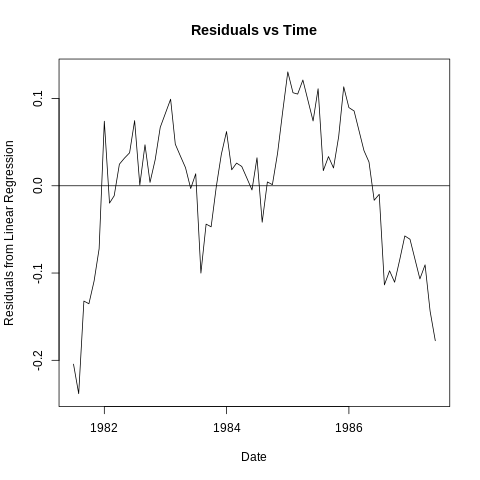

In [ ]:
%%R
plot(wage_data$date, linear_model$residuals, type = "l", xlab = "Date", ylab = "Residuals from Linear Regression", main = "Residuals vs Time")
abline(0, 0)

There seems to be a parabolic shape from the residuals. This could indicate that the linear model is underfit for the data

# 4. Fitting a quadratic time trend model using ordinary least squares.

Plot of the quadratic trend overlain on the data, and displaying the estimated regression equation.


Estimated regression equation for quadratic trend model: 
 Wages =  7.8  +  0.03  * Date +  -1e-04  * Date^2

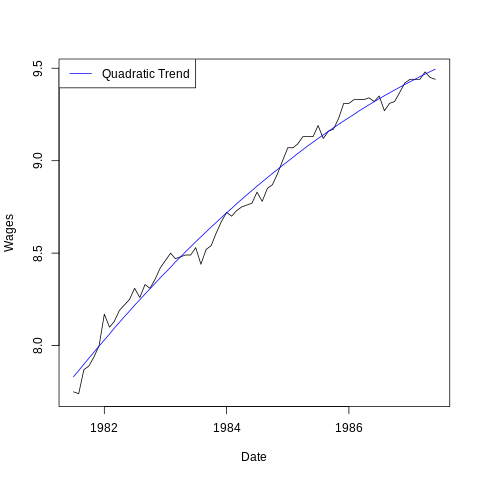

In [ ]:
%%R
# Create a numeric sequence representing each observation's position in time

date_numeric <- seq_along(wage_data$date)

# Square the numeric sequence to include a quadratic term
date_squared <- date_numeric^2

# Fit the quadratic model
quadratic_model <- lm(Wages ~ date_numeric + date_squared, data = wage_data)
summary(quadratic_model)

# Plotting the data with quadratic trend overlain
y_pred_QM <- predict(quadratic_model)

plot(wage_data$date, wage_data$Wages, type = "l", xlab = "Date", ylab = "Wages")
lines(wage_data$date, y_pred_QM, col = "blue")
legend("topleft", legend = "Quadratic Trend", col = "blue", lty = 1)

# Estimated regression equation
cat("Estimated regression equation for quadratic trend model: \n Wages = ", round(coef(quadratic_model)[1], 2), " + ", round(coef(quadratic_model)[2], 2), " * Date + ", round(coef(quadratic_model)[3], 4), " * Date^2")
# Wages =  7.8  +  0.03  * Date +  -1e-04  * Date^2

In [ ]:
#Call:
#  lm(formula = Wages ~ date_numeric + date_squared, data = wage_data)

#Residuals:
#  Min        1Q    Median        3Q       Max
#-0.148318 -0.041440  0.001563  0.050089  0.139839

#Coefficients:
#  Estimate Std. Error t value Pr(>|t|)
#(Intercept)   7.797e+00  2.141e-02 364.127  < 2e-16 ***
#  date_numeric  3.429e-02  1.354e-03  25.328  < 2e-16 ***
#  date_squared -1.488e-04  1.797e-05  -8.282  6.1e-12 ***
#  ---
#  Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#Residual standard error: 0.05889 on 69 degrees of freedom
#Multiple R-squared:  0.9864,	Adjusted R-squared:  0.986
#F-statistic:  2494 on 2 and 69 DF,  p-value: < 2.2e-16

#4. Plotting the standardized residuals from the quadratic regression over time.

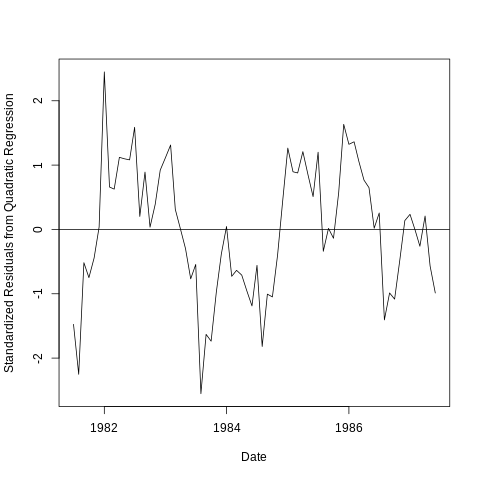

In [ ]:
%%R
stand_residuals <-  rstandard(quadratic_model)


plot(wage_data$date, stand_residuals, type = "l", xlab = "Date", ylab = "Standardized Residuals from Quadratic Regression")
abline(0, 0)


It doesn't seem that the standardized residuals have a pattern with time. It seems like residuals have an oscillating pattern.

# 5. Plotting the autocorrelation function for the standardized residuals from the quadratic regression.

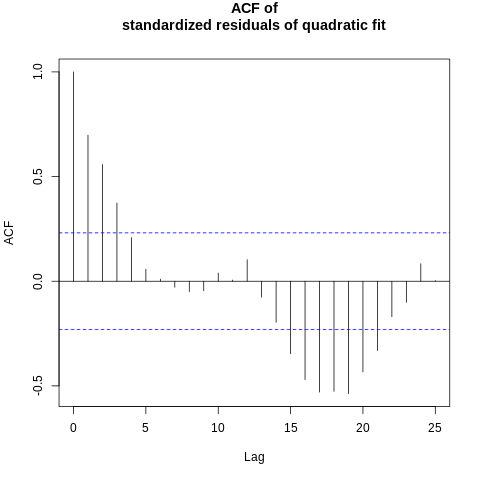

In [ ]:
%%R
acf(stand_residuals, lag.max=25,type="correlation",main="ACF of
standardized residuals of quadratic fit")

The acf of the residuals seem to have a cyclic pattern. The acf is positive, then decreases to zero, and then inverts to negative, then comes back to zero.

For the first 4-5 lags, the autocorrelation is positive, suggesting a positive correlation between the residuals at those lags, meaning that if the residual at one lag is high, the residual at the adjacent lag is also likely to be high.

Then, the autocorrelation decreases to zero. This indicates that there is no correlation between the residuals at those lags.

After that, the autocorrelation becomes negative, suggesting an inverse relationship between the residuals at those lags.

If the residual at one lag is high, the residual at the adjacent lag is likely to be low, and vice versa.

Finally, the autocorrelation returns to zero, indicating no correlation again.

So this pattern suggests some kind of cyclic behavior or periodicity in the residuals of the quadratic model.


# 5. Investigating the normality of the error term from the quadratic regression.


Let's check the following for Residual plots:

* Normality probability
* Histogram
* Against fitted values
* Against time

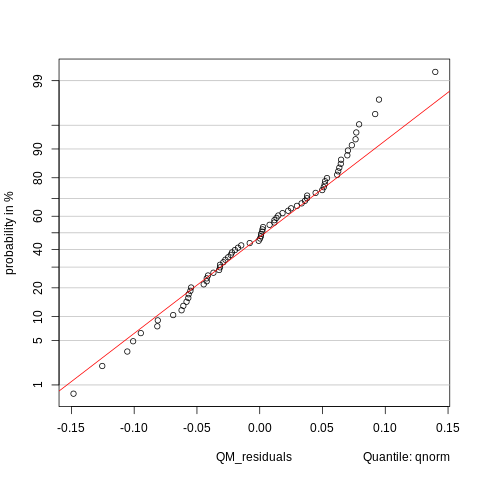

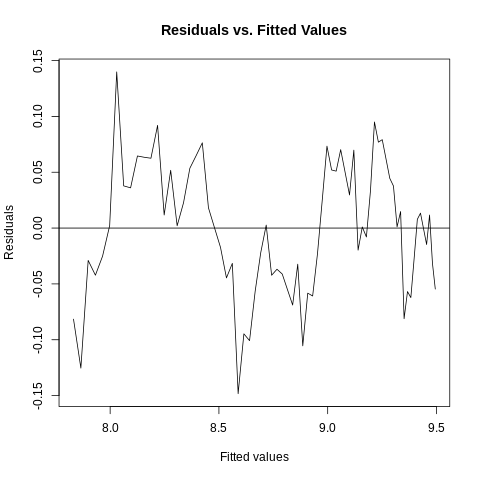

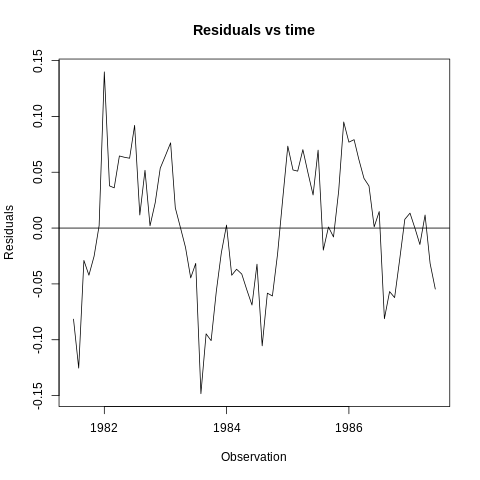

In [ ]:
%%R
QM_residuals <-residuals(quadratic_model)

# Normality probability:
check <- probplot(QM_residuals, ylab = "probability in %")

# Plot residuals against fitted values
fitted_values <- fitted(quadratic_model)

plot(fitted_values, QM_residuals,
     xlab = "Fitted values",
     ylab = "Residuals",
     main = "Residuals vs. Fitted Values", type ="l")
abline(0, 0)

# plot residuals vs time
plot(wage_data$date, QM_residuals, ylab="Residuals", xlab="Observation", main="Residuals vs time", type ="l")
abline(0, 0)

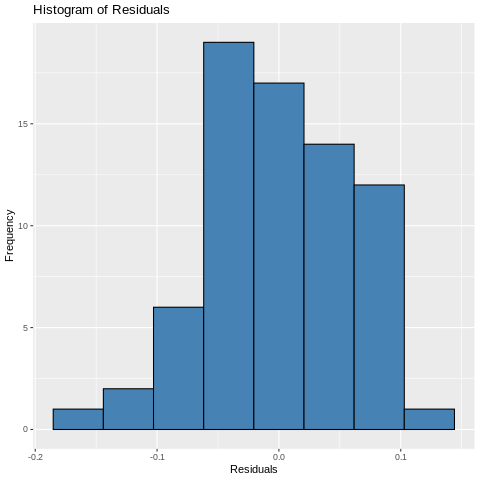

In [ ]:
%%R
# Check histogram:
ggplot(data = wage_data, aes(x = QM_residuals)) +
  geom_histogram(bins=8, fill = 'steelblue', color = 'black') +
  labs(title = 'Histogram of Residuals', x = 'Residuals', y = 'Frequency')


The behavior of the different residual plots confirms that there is a cyclic behavior to the data of wages vs time.

The quadratic fit is a decent fit for the data, however, the cyclic behavior is not captured or ignored, hence the residuals exihibit a cyclic behavior.
